In [168]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier

In [229]:
data=pd.read_csv('Downloads/train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [170]:
df21=pd.read_csv('Downloads/test.csv')
df21

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [171]:
df21.drop('id',axis=1,inplace=True)


In [172]:
df21.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [230]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [174]:
df2.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [175]:
df2.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [176]:
df2.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

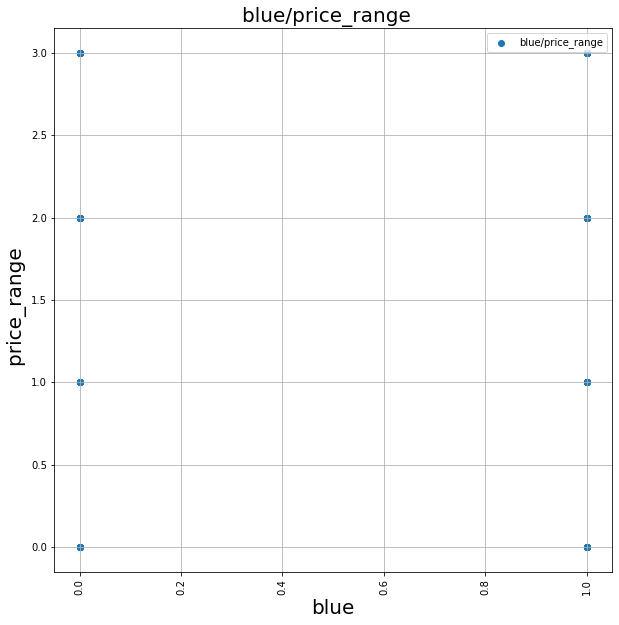

In [177]:
plt.figure(figsize=(10,10))
plt.scatter(data['blue'],data['price_range'])
plt.title("blue/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('blue',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['blue/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

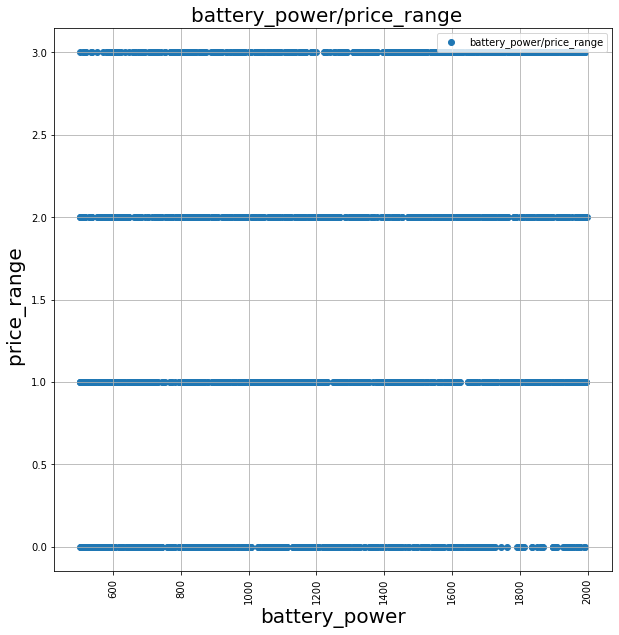

In [178]:
plt.figure(figsize=(10,10))
plt.scatter(df2['battery_power'],df2['price_range'])
plt.title("battery_power/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('battery_power',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['battery_power/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

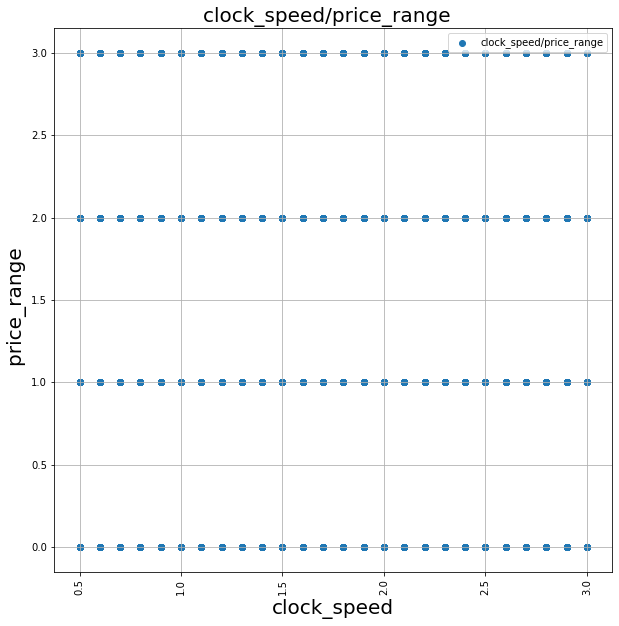

In [179]:
plt.figure(figsize=(10,10))
plt.scatter(df2['clock_speed'],df2['price_range'])
plt.title("clock_speed/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('clock_speed',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['clock_speed/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

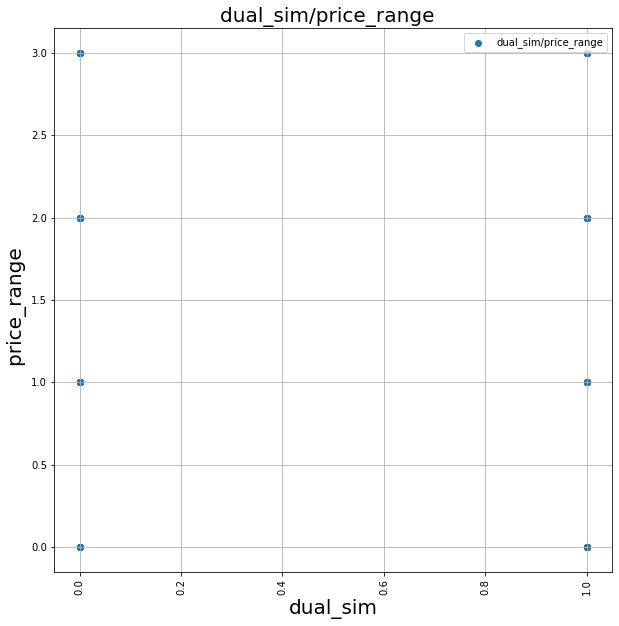

In [180]:
plt.figure(figsize=(10,10))
plt.scatter(df2['dual_sim'],df2['price_range'])
plt.title("dual_sim/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('dual_sim',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['dual_sim/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

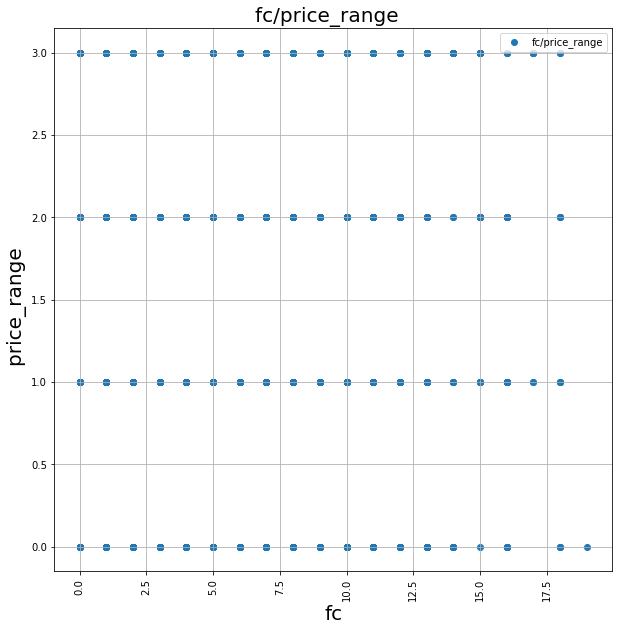

In [181]:
plt.figure(figsize=(10,10))
plt.scatter(df2['fc'],df2['price_range'])
plt.title("fc/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('fc',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['fc/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

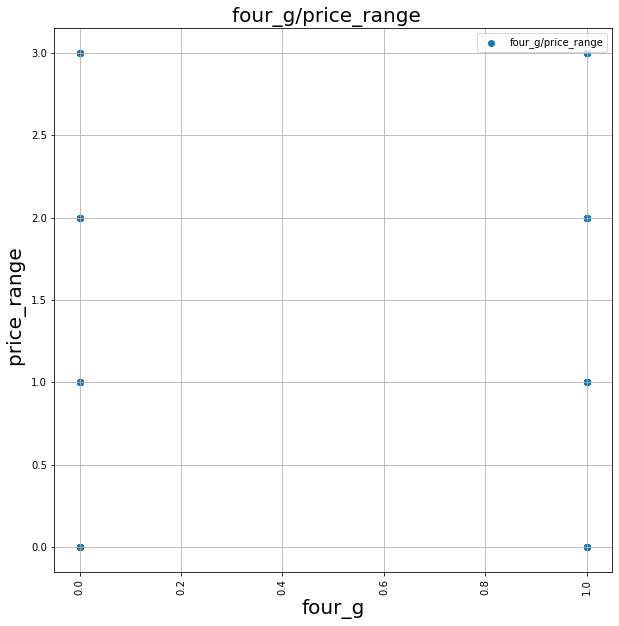

In [182]:
plt.figure(figsize=(10,10))
plt.scatter(df2['four_g'],df2['price_range'])
plt.title("four_g/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('four_g',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['four_g/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

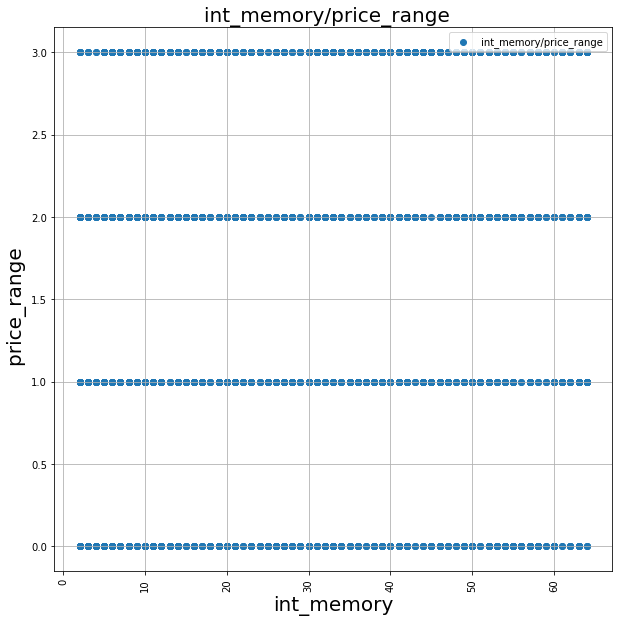

In [183]:
plt.figure(figsize=(10,10))
plt.scatter(df2['int_memory'],df2['price_range'])
plt.title("int_memory/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('int_memory',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['int_memory/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

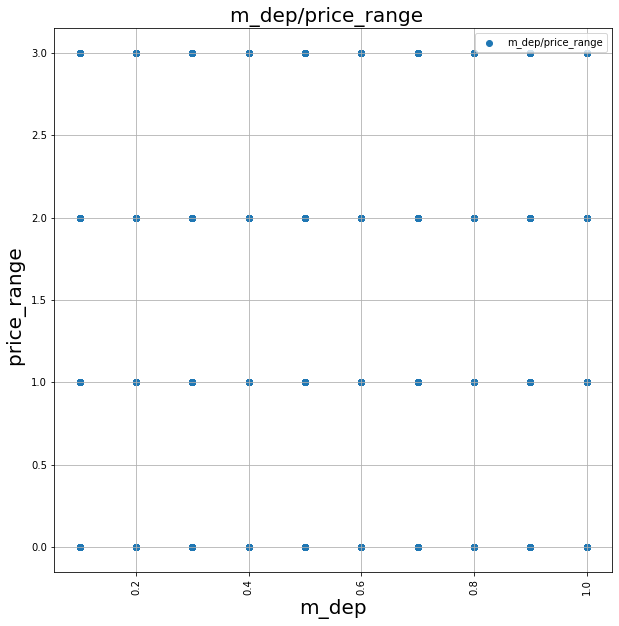

In [184]:
plt.figure(figsize=(10,10))
plt.scatter(df2['m_dep'],df2['price_range'])
plt.title("m_dep/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('m_dep',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['m_dep/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

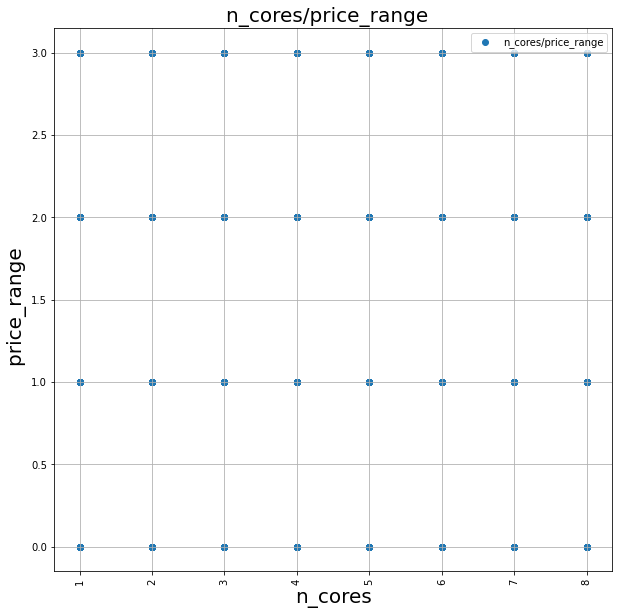

In [185]:
plt.figure(figsize=(10,10))
plt.scatter(df2['n_cores'],df2['price_range'])
plt.title("n_cores/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('n_cores',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['n_cores/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

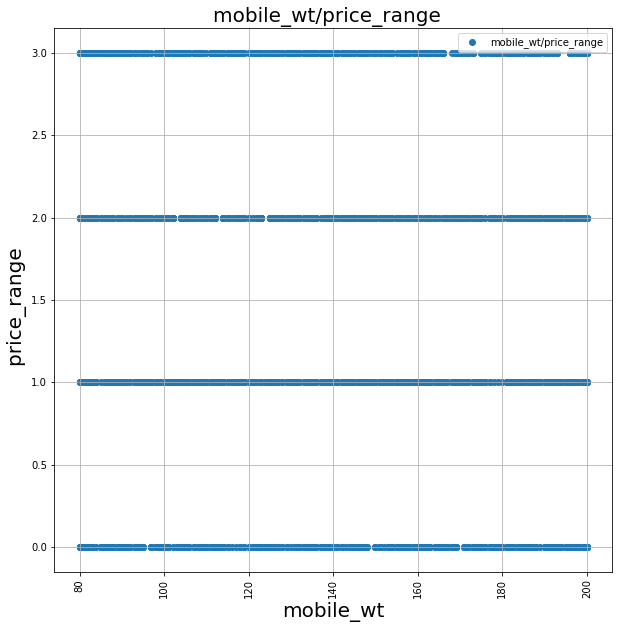

In [186]:
plt.figure(figsize=(10,10))
plt.scatter(df2['mobile_wt'],df2['price_range'])
plt.title("mobile_wt/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('mobile_wt',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['mobile_wt/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

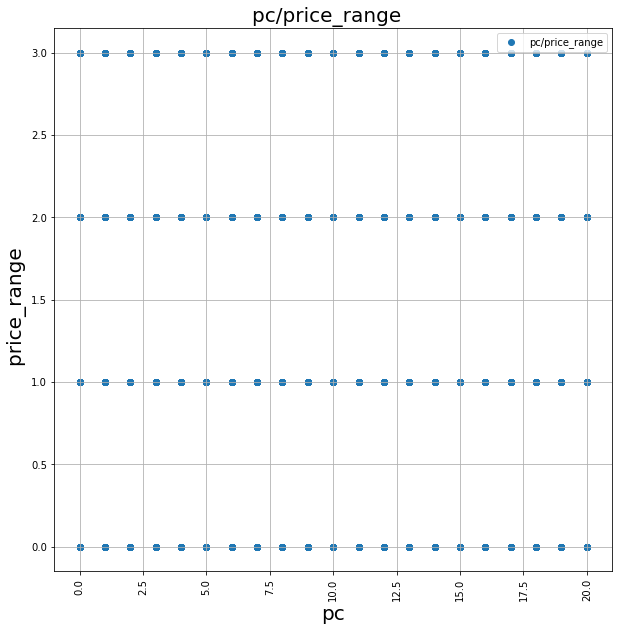

In [187]:
plt.figure(figsize=(10,10))
plt.scatter(df2['pc'],df2['price_range'])
plt.title("pc/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('pc',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['pc/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

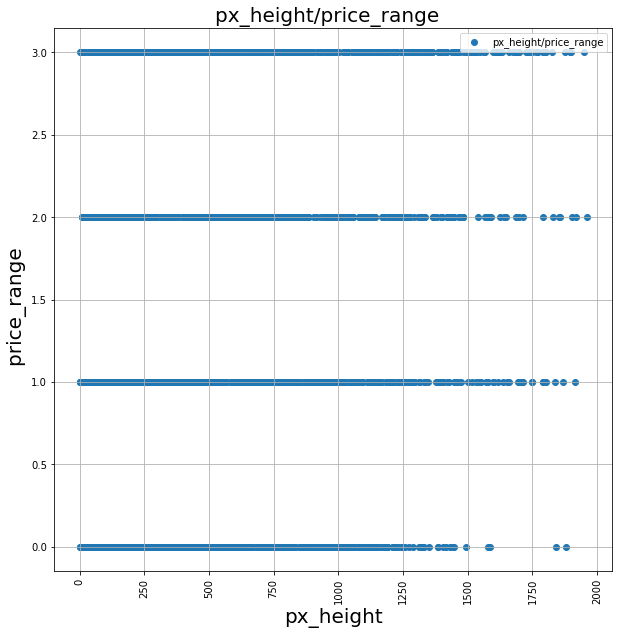

In [188]:
plt.figure(figsize=(10,10))
plt.scatter(df2['px_height'],df2['price_range'])
plt.title("px_height/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('px_height',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['px_height/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

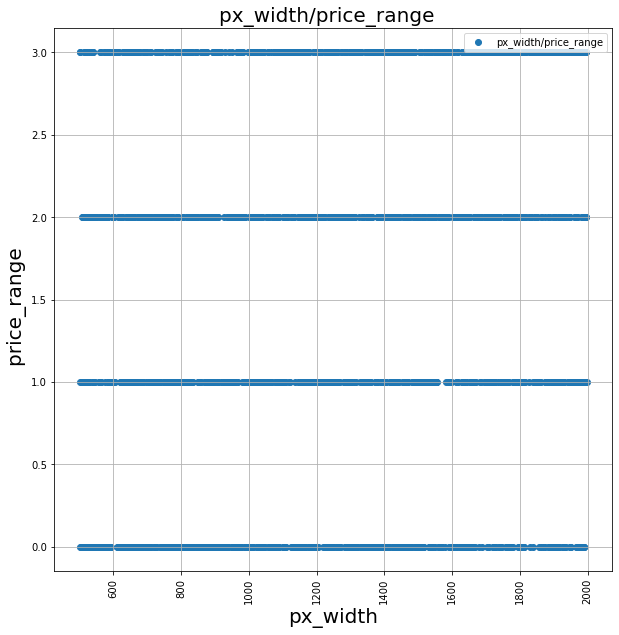

In [189]:
plt.figure(figsize=(10,10))
plt.scatter(df2['px_width'],df2['price_range'])
plt.title("px_width/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('px_width',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['px_width/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

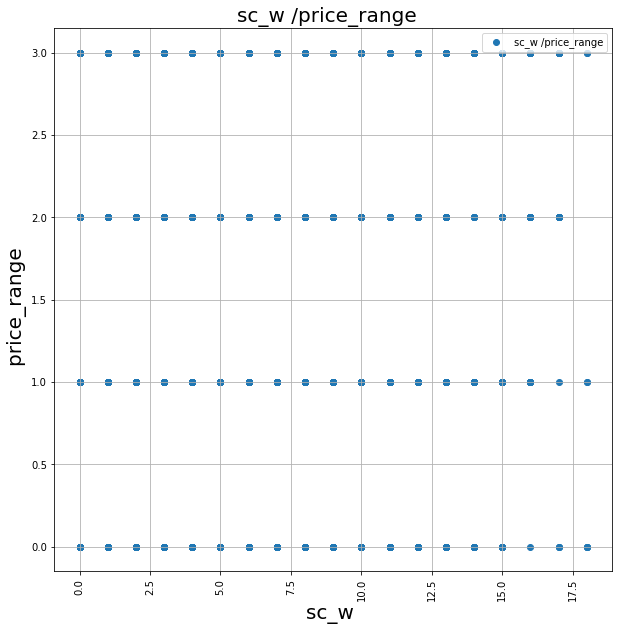

In [190]:
plt.figure(figsize=(10,10))
plt.scatter(df2['sc_w'],df2['price_range'])
plt.title("sc_w /price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('sc_w ',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['sc_w /price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

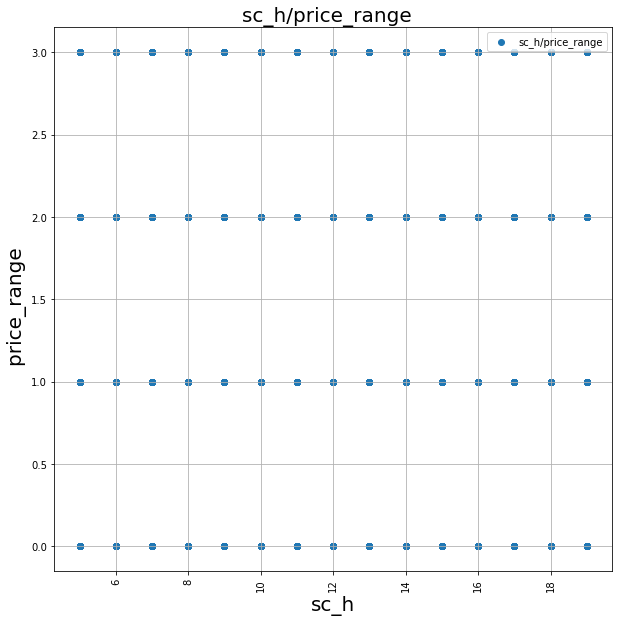

In [191]:
plt.figure(figsize=(10,10))
plt.scatter(df2['sc_h'],df2['price_range'])
plt.title("sc_h/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('sc_h',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['sc_h/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

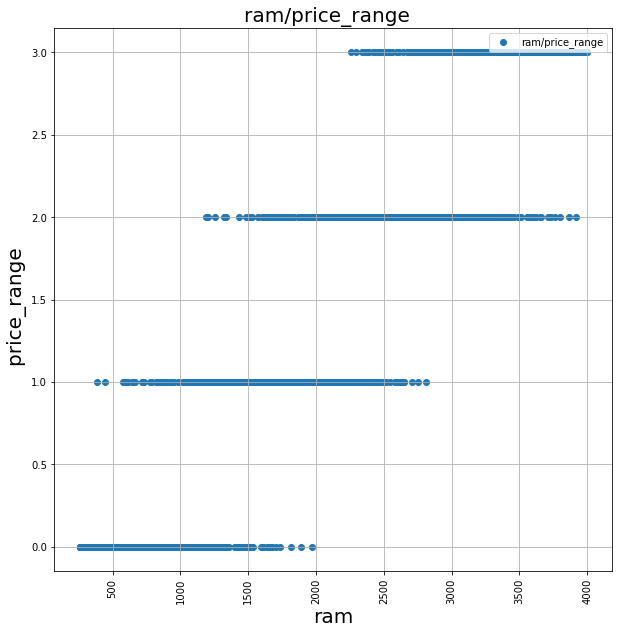

In [192]:
plt.figure(figsize=(10,10))
plt.scatter(df2['ram'],df2['price_range'])
plt.title("ram/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('ram',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['ram/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

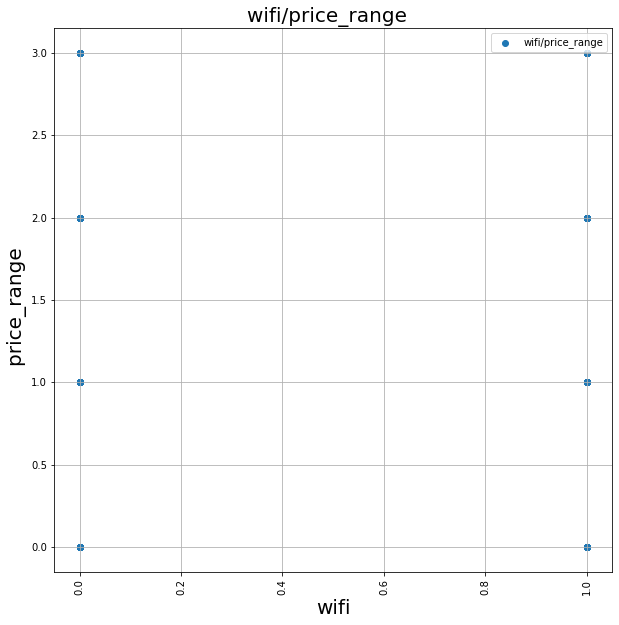

In [193]:
plt.figure(figsize=(10,10))
plt.scatter(df2['wifi'],df2['price_range'])
plt.title("wifi/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('wifi',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['wifi/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

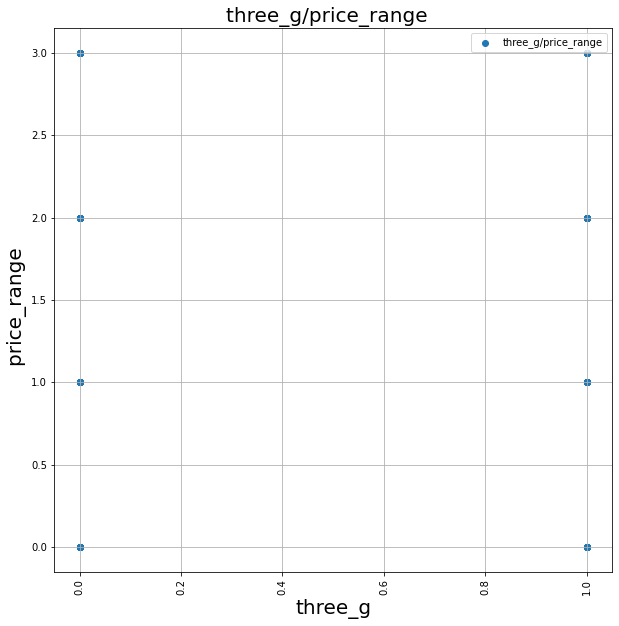

In [194]:
plt.figure(figsize=(10,10))
plt.scatter(df2['three_g'],df2['price_range'])
plt.title("three_g/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('three_g',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['three_g/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

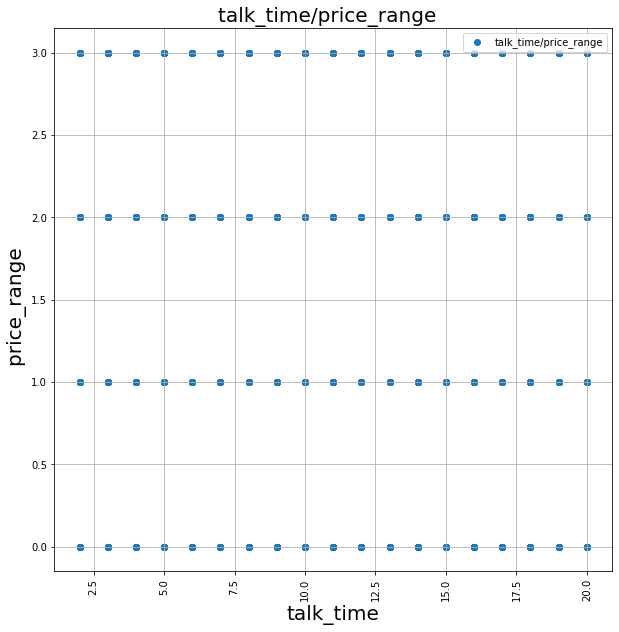

In [195]:
plt.figure(figsize=(10,10))
plt.scatter(df2['talk_time'],df2['price_range'])
plt.title("talk_time/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('talk_time',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['talk_time/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

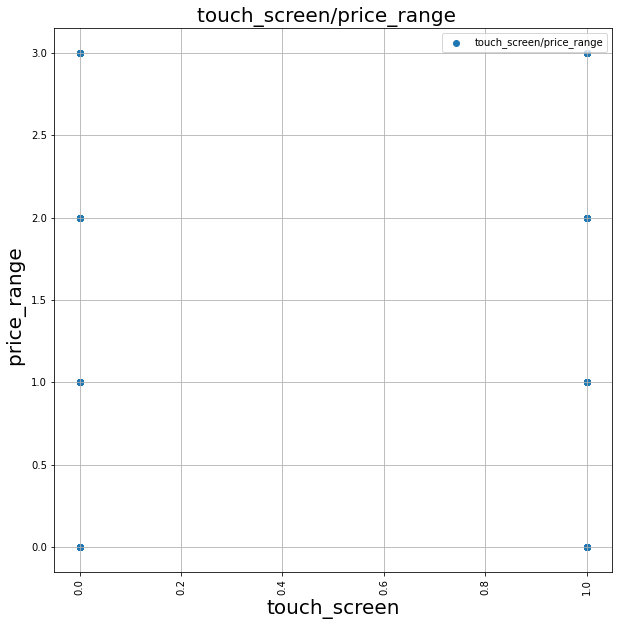

In [196]:
plt.figure(figsize=(10,10))
plt.scatter(df2['touch_screen'],df2['price_range'])
plt.title("touch_screen/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('touch_screen',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['touch_screen/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

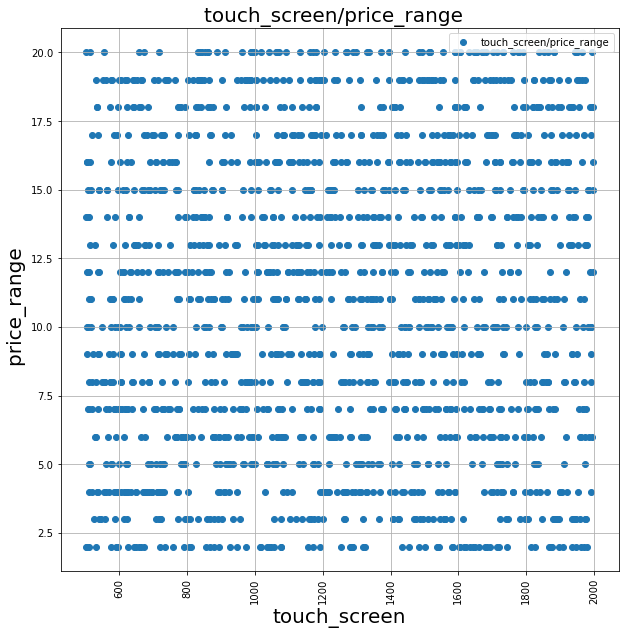

In [263]:
plt.figure(figsize=(10,10))
plt.scatter(df2['battery_power'],df2['talk_time'])
plt.title("touch_screen/price_range  ",fontsize=20)
plt.ylabel('price_range  ',fontsize=20)
plt.xlabel('touch_screen',fontsize=20)
plt.grid()
plt.xticks (rotation=90)
plt.legend(['touch_screen/price_range'])
plt.savefig('Downloads/jk/picture.png')
plt.show()

Text(0.5, 1.0, '')

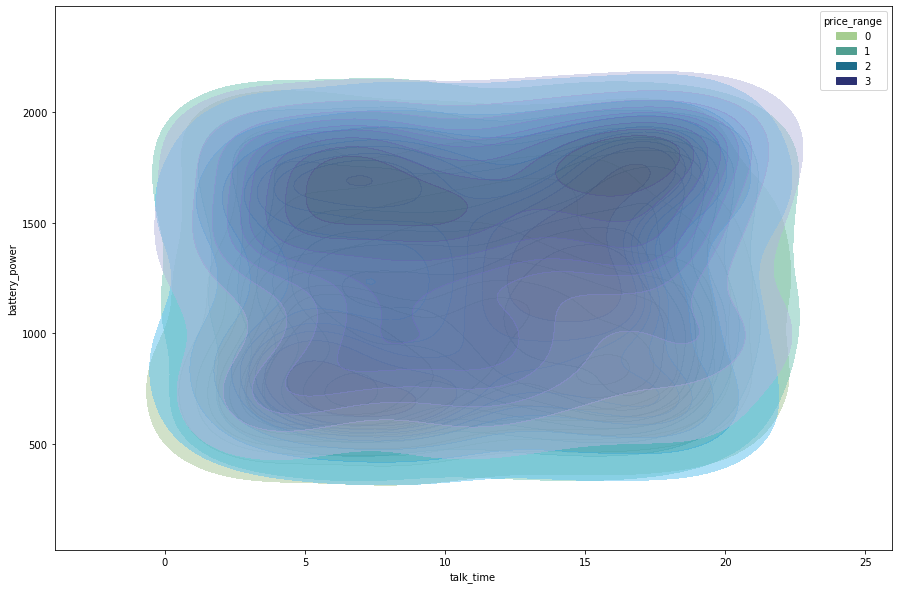

In [264]:
fig=plt.figure(figsize=[15,10])
sns.kdeplot(data['talk_time'],data['battery_power'],hue=data["price_range"],shade=True,fill=True,common_norm=False,palette="crest",alpha=.5,linewidth=0)
plt.title("")

Text(0.5, 1.0, '')

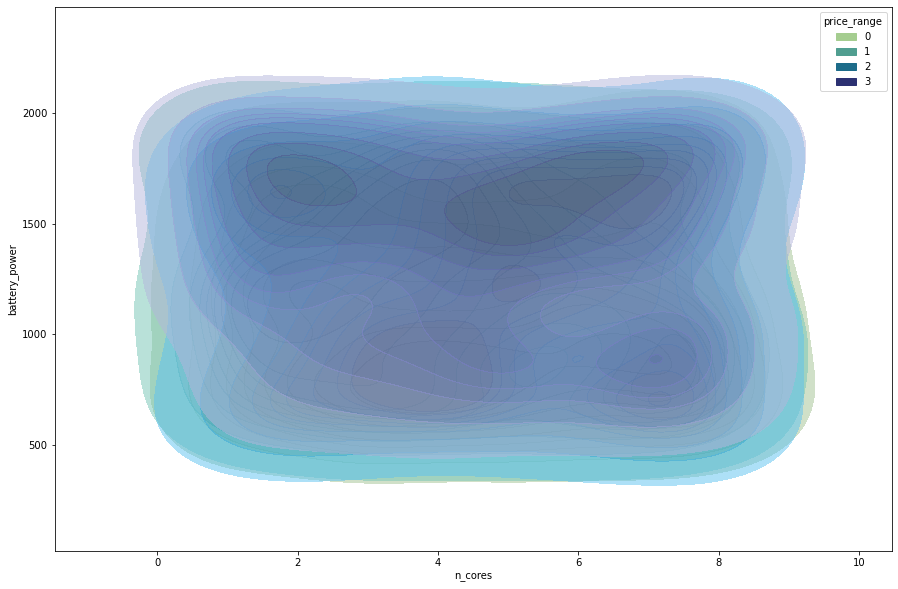

In [251]:
fig=plt.figure(figsize=[15,10])
sns.kdeplot(data['n_cores'],data['battery_power'],hue=data["price_range"],shade=True,fill=True,common_norm=False,palette="crest",alpha=.5,linewidth=0)
plt.title("")

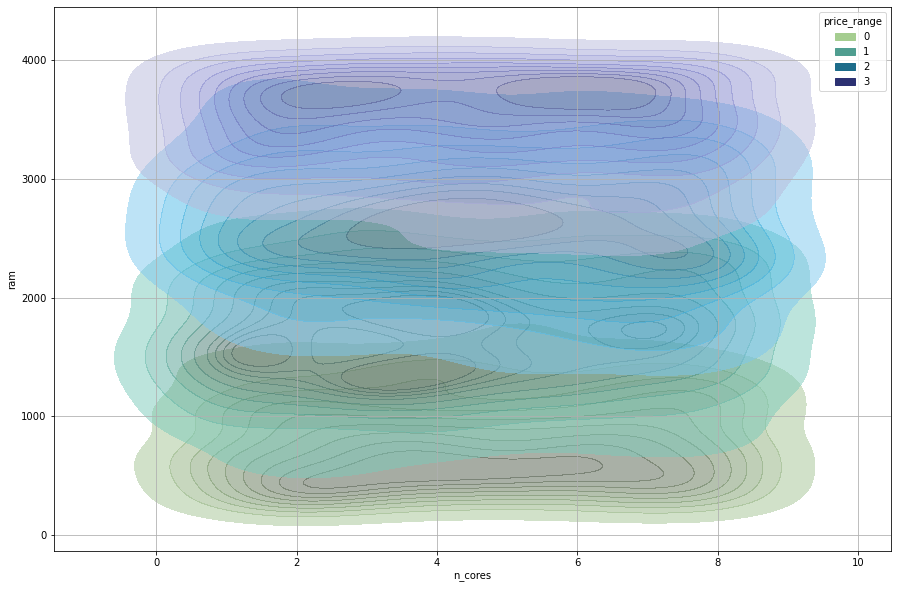

In [250]:
fig=plt.figure(figsize=[15,10])
sns.kdeplot(data['n_cores'],data['ram'],hue=data["price_range"],shade=True,fill=True,common_norm=False,palette="crest",alpha=.5,linewidth=0)
plt.title("")
plt.grid()

Text(0.5, 1.0, '')

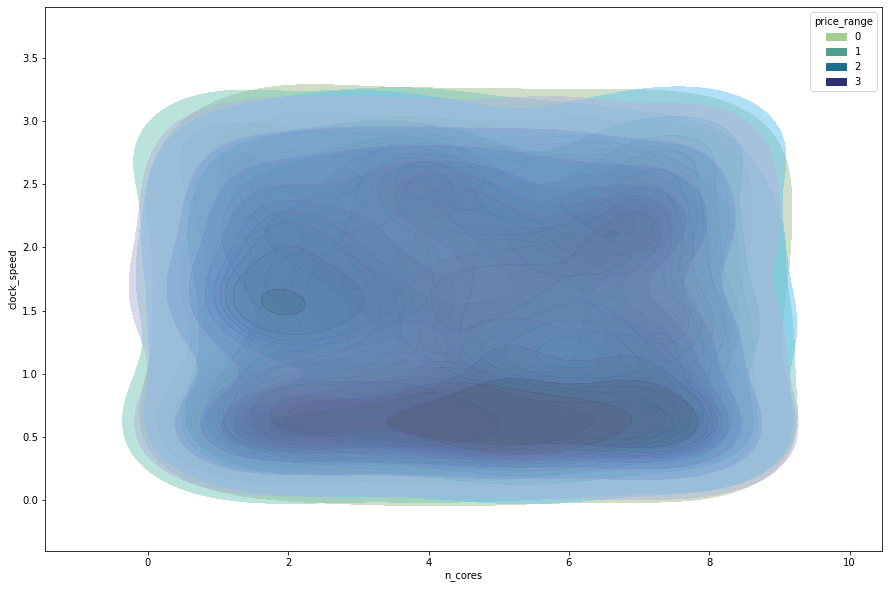

In [231]:
fig=plt.figure(figsize=[15,10])
sns.kdeplot(data['n_cores'],data['clock_speed'],hue=data["price_range"],shade=True,fill=True,common_norm=False,palette="crest",alpha=.5,linewidth=0)
plt.title("")

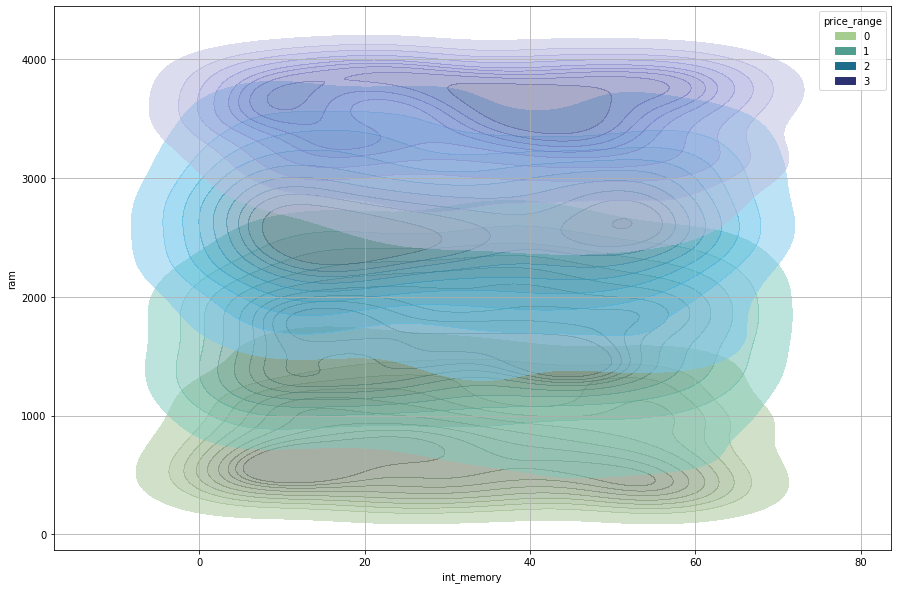

In [265]:
fig=plt.figure(figsize=[15,10])
sns.kdeplot(data['int_memory'],data['ram'],hue=data["price_range"],shade=True,fill=True,common_norm=False,palette="crest",alpha=.5,linewidth=0)
plt.title("")
plt.grid()

In [266]:
#اون گوشی هایی سرعت ساعت کمتری دارن قیمت شون بالاتره 

In [199]:
df2.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


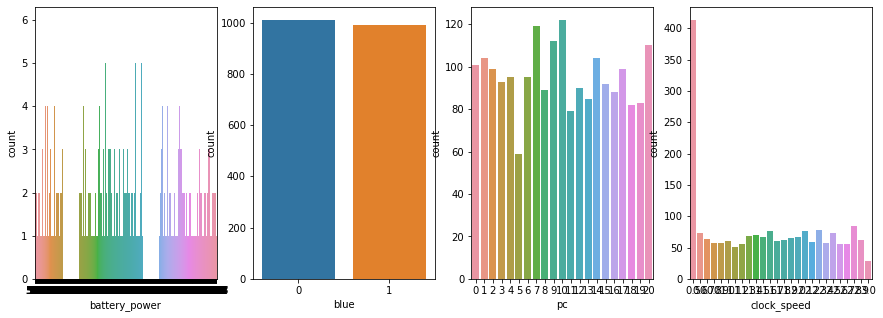

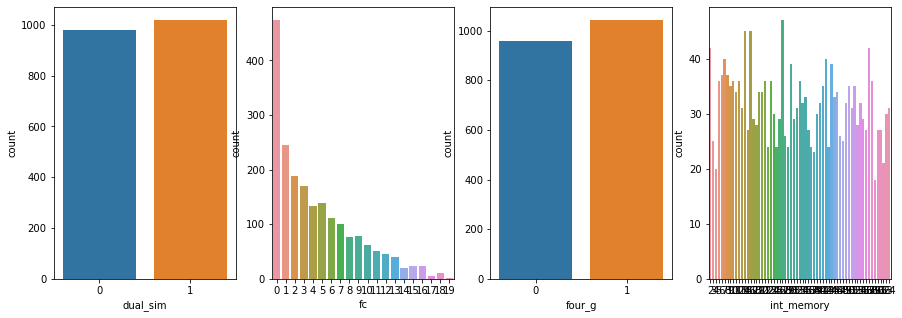

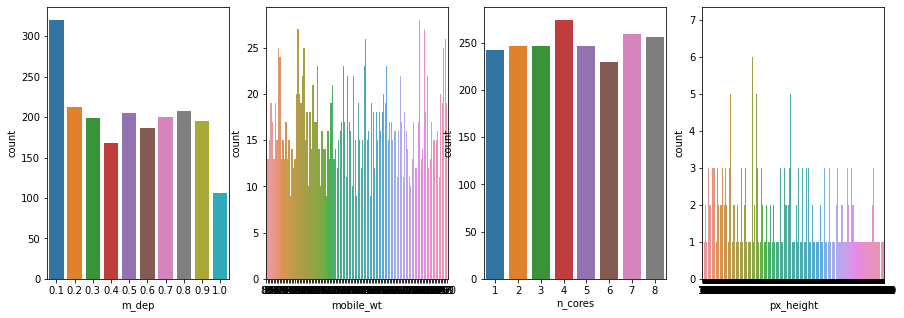

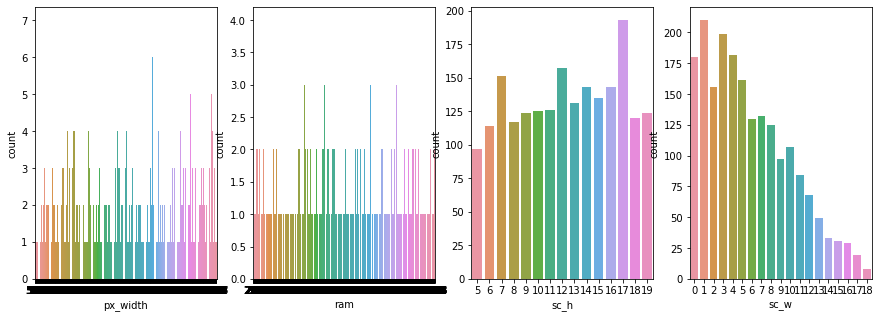

In [201]:
categorical=categorical=[ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w' ]
i=0
while i<16:
    fig=plt.figure(figsize=[15,5])
    plt.subplot(1,4,1)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    
    plt.subplot(1,4,2)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    plt.subplot(1,4,3)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    plt.subplot(1,4,4)
    sns.countplot(x=categorical[i],data=data)
    i+=1
    
    plt.show

<AxesSubplot:xlabel='clock_speed', ylabel='count'>

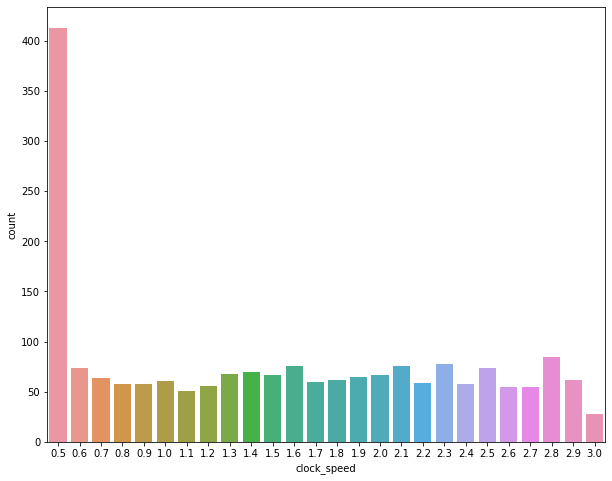

In [232]:
fig=plt.figure(figsize=[10,8])
sns.countplot(data['clock_speed'])


In [373]:
df2=data[data['clock_speed']>0.5]
df2
df2.reset_index(drop=True,inplace=True)
df2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
2,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
3,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
4,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1583,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1584,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1585,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [261]:
df23=df2[df2["three_g"]==1]
df23

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
2,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
3,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
4,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
6,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1582,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1583,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1584,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1585,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [262]:
df234=df23[df23["blue"]==1]
df234

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
2,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
4,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
6,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,3
8,803,1,2.1,0,7,0,17,1.0,198,4,...,344,1440,2680,7,1,4,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,618,1,1.0,0,9,1,13,0.1,80,4,...,591,724,1424,15,12,7,1,1,0,0
1579,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1581,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1583,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2


In [228]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [227]:
df2.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.015688,0.027184,-0.038918,0.036430,0.000370,0.000821,0.027970,-0.004554,-0.037627,...,0.024516,0.003116,0.000237,-0.026164,-0.000699,0.055332,-0.012065,0.015920,-0.007104,0.204291
blue,0.015688,1.000000,0.051021,0.026171,0.008992,0.015118,0.044931,0.007131,0.018097,0.036380,...,0.011216,-0.028982,0.055050,-0.008490,0.006344,0.018500,-0.036770,-0.018082,-0.013039,0.050753
clock_speed,0.027184,0.051021,1.000000,0.004020,0.006613,-0.038354,0.013959,-0.007020,0.024707,0.006752,...,-0.018083,-0.008957,-0.012945,-0.019663,-0.004362,-0.000557,-0.055387,0.022526,-0.027401,-0.023627
dual_sim,-0.038918,0.026171,0.004020,1.000000,-0.029651,0.012773,-0.011718,-0.018424,-0.014691,-0.034726,...,-0.010092,0.007561,0.031341,-0.025990,-0.035881,-0.040299,0.001522,-0.012123,0.035774,0.009206
fc,0.036430,0.008992,0.006613,-0.029651,1.000000,-0.000838,-0.019171,0.004020,0.025276,-0.010080,...,-0.006202,-0.010810,0.027159,-0.004990,-0.028205,-0.005512,0.011239,-0.012014,0.021235,0.036630
four_g,0.000370,0.015118,-0.038354,0.012773,-0.000838,1.000000,0.000967,0.003736,-0.015848,-0.011413,...,-0.051256,-0.027742,-0.005362,0.017557,0.048041,-0.046934,0.580967,0.019263,0.009176,-0.011817
int_memory,0.000821,0.044931,0.013959,-0.011718,-0.019171,0.000967,1.000000,0.008391,-0.032259,-0.049264,...,0.014911,-0.000436,0.040273,0.035794,0.012989,0.032673,-0.007455,-0.025581,0.011159,0.058412
m_dep,0.027970,0.007131,-0.007020,-0.018424,0.004020,0.003736,0.008391,1.000000,0.007280,-0.000897,...,0.034719,0.030194,-0.014752,-0.019268,-0.005222,0.019325,-0.009478,-0.003675,-0.037963,-0.000280
mobile_wt,-0.004554,0.018097,0.024707,-0.014691,0.025276,-0.015848,-0.032259,0.007280,1.000000,-0.014515,...,-0.012093,-0.020486,0.000252,-0.049333,-0.034735,0.018848,-0.007245,-0.012493,-0.009855,-0.035673
n_cores,-0.037627,0.036380,0.006752,-0.034726,-0.010080,-0.011413,-0.049264,-0.000897,-0.014515,1.000000,...,0.009236,0.038809,0.000477,-0.009279,0.013405,0.009608,0.002631,0.024279,-0.003162,-0.001913


Text(0.5, 1.0, '')

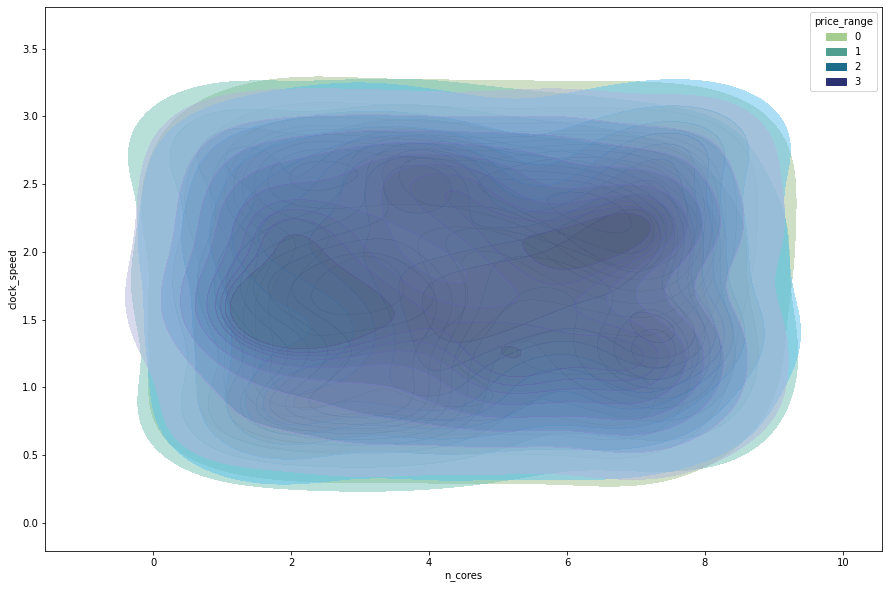

In [234]:
fig=plt.figure(figsize=[15,10])
sns.kdeplot(df2['n_cores'],df2['clock_speed'],hue=df2["price_range"],shade=True,fill=True,common_norm=False,palette="crest",alpha=.5,linewidth=0)
plt.title("")

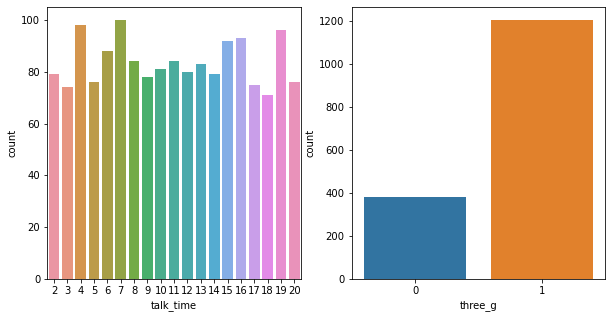

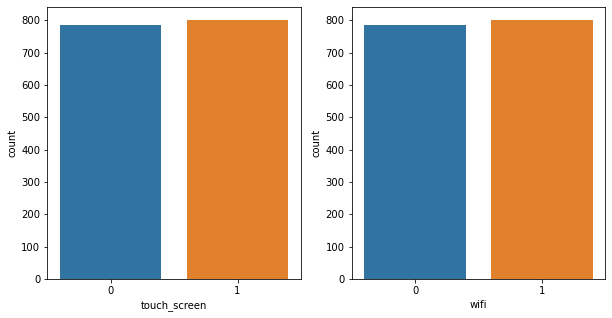

In [207]:
categorical=['talk_time','three_g','touch_screen','wifi']
i=0
while i<4:
    fig=plt.figure(figsize=[10,5])
    plt.subplot(1,2,1)
    sns.countplot(x=categorical[i],data=df2)
    i+=1
    plt.subplot(1,2,2)
    sns.countplot(x=categorical[i],data=df2)
    i+=1
    plt.show


In [208]:
#RandomForest
X= pd.DataFrame(df2, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y = df2.price_range.values.reshape(-1,1)


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25 ,random_state=0)

In [210]:
clf=RandomForestClassifier(n_estimators=50,max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [211]:
print(metrics.accuracy_score(y_test,y_pred))

0.7884130982367759


In [212]:
def Forest(X,y,Test_size):
    df_evaluation=pd.DataFrame()
    for x in Test_size:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=x ,random_state=0) 
        clf=RandomForestClassifier(n_estimators=50,max_depth=3)
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test,y_pred),"score":clf.score(X,y)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train, X_test, y_train, y_test ,y_pred,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train, X_test, y_train, y_test ,y_pred,df_evaluation=Forest(X,y,[0.1,0.15,0.2,0.25,0.3,0.4])
df_evaluation.style.apply(highlight_max)


,Test_size,acc,score
0,0.100000,0.805031,0.844991
1,0.150000,0.794979,0.839950
2,0.200000,0.798742,0.830498
3,0.250000,0.795970,0.835539
4,0.300000,0.773585,0.823566
5,0.400000,0.793701,0.838059


In [213]:
def Forest(X,y,Maxdepth):
    df_evaluation=pd.DataFrame()
    
    for p in Maxdepth:
        
        clf2=RandomForestClassifier(max_depth=p)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1 ,random_state=0) 
        clf2.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        dict={'acc':metrics.accuracy_score(y_test,y_pred),"score":clf.score(X,y),'Max depth':p}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train, X_test, y_train, y_test ,y_pred,df_evaluation)         
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train, X_test, y_train, y_test ,y_pred,df_evaluation=Forest(X,y,range(1,50))
df_evaluation.style.apply(highlight_max)


,Max depth,acc,score
0,1.000000,0.786164,0.841210
1,2.000000,0.786164,0.841210
2,3.000000,0.786164,0.841210
3,4.000000,0.786164,0.841210
4,5.000000,0.786164,0.841210
5,6.000000,0.786164,0.841210
6,7.000000,0.786164,0.841210
7,8.000000,0.786164,0.841210
8,9.000000,0.786164,0.841210
9,10.000000,0.786164,0.841210


In [214]:
def Forest(X,y,N_estimators):
    df_evaluation=pd.DataFrame()
    
    for p in N_estimators:
        
        clf2=RandomForestClassifier(max_depth=17,n_estimators=p)
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1 ,random_state=0) 
        clf2.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        dict={'acc':metrics.accuracy_score(y_test,y_pred),"score":clf.score(X,y),'N_estimators':p}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train, X_test, y_train, y_test ,y_pred,df_evaluation)         
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train, X_test, y_train, y_test ,y_pred,df_evaluation=Forest(X,y,range(1,200))
df_evaluation.style.apply(highlight_max)


,N_estimators,acc,score
0,1.000000,0.786164,0.841210
1,2.000000,0.786164,0.841210
2,3.000000,0.786164,0.841210
3,4.000000,0.786164,0.841210
4,5.000000,0.786164,0.841210
5,6.000000,0.786164,0.841210
6,7.000000,0.786164,0.841210
7,8.000000,0.786164,0.841210
8,9.000000,0.786164,0.841210
9,10.000000,0.786164,0.841210


In [235]:
X5= pd.DataFrame(data, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y5= data.price_range.values.reshape(-1,1)

In [236]:
X= pd.DataFrame(df2, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y = df2.price_range.values.reshape(-1,1)

In [237]:
clf=RandomForestClassifier(max_depth=17)
X_train, X_test, y_train, y_test = train_test_split(X5,y5,test_size=0.1 ,random_state=0) 
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.87


In [238]:
clf5=RandomForestClassifier(max_depth=17)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X5,y5,test_size=0.25 ,random_state=0) 
clf5.fit(X_train10,y_train10)
y_pred5=clf5.predict(X_test5)
print("Accuracy:",metrics.accuracy_score(y_test5,y_pred5))

Accuracy: 0.9270833333333334


In [239]:
confusion_matrix(y,clf.predict(X))
#1567t20f

array([[390,   1,   0,   0],
       [  2, 388,   5,   0],
       [  0,   5, 394,   5],
       [  0,   0,   2, 395]], dtype=int64)

In [240]:
confusion_matrix(y5,clf5.predict(X5))


array([[497,   3,   0,   0],
       [  8, 480,  12,   0],
       [  0,  19, 470,  11],
       [  0,   0,   9, 491]], dtype=int64)

In [241]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation=KFold(23)
results=cross_val_score(clf,X,y.ravel(),cv=kfold_validation,n_jobs=1)
print(results)
print(np.mean(results))

[0.88405797 0.91304348 0.89855072 0.86956522 0.82608696 0.91304348
 0.85507246 0.84057971 0.84057971 0.89855072 0.88405797 0.91304348
 0.84057971 0.88405797 0.88405797 0.89855072 0.88405797 0.82608696
 0.82608696 0.86956522 0.86956522 0.86956522 0.88405797]
0.8727158160050409


In [342]:

df3=df2[df2.index<1440]
df4=df2[df2.index>1520]
df5=df3.append(df4)
df5.reset_index(drop=True,inplace=True)
X5= pd.DataFrame(df5, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y5= df5.price_range.values.reshape(-1,1)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5,test_size=0.1 ,random_state=0) 
clf5=RandomForestClassifier(max_depth=17)
clf5.fit(X_train5,y_train5)
y_pred5=clf5.predict(X_test5)
print("Accuracy:",metrics.accuracy_score(y_test5,y_pred5))
confusion_matrix(y5,clf5.predict(X5))


Accuracy: 0.8675496688741722


array([[357,   2,   0,   0],
       [  2, 377,   2,   0],
       [  0,   8, 378,   1],
       [  0,   0,   5, 374]], dtype=int64)

In [267]:
#Decision Trees
X2= pd.DataFrame(df2, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y2= df2.price_range.values.reshape(-1,1)


In [271]:
def Forest(X2,y2,Test_size):
    df_evaluation=pd.DataFrame()
    for x in Test_size:
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=x ,random_state=0) 
        clf2=DecisionTreeClassifier(max_depth=3)
        clf2.fit(X_train2,y_train2)
        y_pred2=clf2.predict(X_test2)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test2,y_pred2),"score":clf.score(X2,y2)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train2, X_test2, y_train2, y_test2 ,y_pred2,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train2,X_test2,y_train2,y_test2,y_pred2,df_evaluation=Forest(X2,y2,[0.1,0.15,0.2,0.25,0.3,0.4])
df_evaluation.style.apply(highlight_max)


,Test_size,acc,score
0,0.100000,0.735849,0.987398
1,0.150000,0.748954,0.987398
2,0.200000,0.745283,0.987398
3,0.250000,0.738035,0.987398
4,0.300000,0.740042,0.987398
5,0.400000,0.732283,0.987398


In [272]:
def Forest(X2,y2,Maxdepth):
    df_evaluation=pd.DataFrame()
    
    for p in Maxdepth:
        
        clf2=DecisionTreeClassifier(max_depth=p)
        X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.15 ,random_state=0) 
        clf2.fit(X_train2,y_train2)
        y_pred2=clf2.predict(X_test2)
        dict={'acc':metrics.accuracy_score(y_test2,y_pred2),"score":clf2.score(X2,y2),'Maxdepth':p}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train2, X_test2, y_train2, y_test2 ,y_pred2,df_evaluation)         
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train2, X_test2, y_train2, y_test2 ,y_pred2,df_evaluation=Forest(X2,y2,range(1,50))
df_evaluation.style.apply(highlight_max)


,Maxdepth,acc,score
0,1.000000,0.527197,0.496534
1,2.000000,0.769874,0.759294
2,3.000000,0.748954,0.770636
3,4.000000,0.815900,0.836799
4,5.000000,0.761506,0.873346
5,6.000000,0.774059,0.911783
6,7.000000,0.774059,0.932577
7,8.000000,0.790795,0.950221
8,9.000000,0.778243,0.952741
9,10.000000,0.769874,0.955261


In [274]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2,test_size=0.15 ,random_state=0) 
clf2=DecisionTreeClassifier(max_depth=46)
clf2.fit(X_train2,y_train2)
y_pred2=clf2.predict(X_test2)
print(metrics.accuracy_score(y_test2,y_pred2))

0.7656903765690377


In [275]:
confusion_matrix(y2,clf2.predict(X2))

array([[379,  12,   0,   0],
       [  9, 376,  10,   0],
       [  0,   6, 390,   8],
       [  0,   0,  11, 386]], dtype=int64)

In [280]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation=KFold(23)
results=cross_val_score(clf2,X2,y2.ravel(),cv=kfold_validation,n_jobs=1)
print(results)
print(np.mean(results))

[0.84057971 0.86956522 0.82608696 0.89855072 0.84057971 0.7826087
 0.7826087  0.85507246 0.84057971 0.92753623 0.8115942  0.88405797
 0.84057971 0.88405797 0.86956522 0.84057971 0.85507246 0.85507246
 0.79710145 0.84057971 0.82608696 0.86956522 0.84057971]
0.8468809073724005


In [292]:

df3=df2[df2.index<1242]
df4=df2[df2.index>1311]
df5=df3.append(df4)
df5.reset_index(drop=True,inplace=True)
X3= pd.DataFrame(df5, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y3= df5.price_range.values.reshape(-1,1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3,test_size=0.15 ,random_state=0) 
clf3=DecisionTreeClassifier(max_depth=46)
clf3.fit(X_train3,y_train3)
y_pred3=clf3.predict(X_test3)
print("Accuracy:",metrics.accuracy_score(y_test3,y_pred3))
 

Accuracy: 0.8377192982456141


In [293]:
#disiontree
confusion_matrix(y3,clf.predict(X3))

array([[372,   5,   0,   0],
       [  3, 367,   4,   0],
       [  0,   4, 378,   4],
       [  0,   0,   9, 371]], dtype=int64)

In [294]:
print(classification_report(y3,clf3.predict(X3)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       377
           1       0.98      0.95      0.96       374
           2       0.97      0.98      0.98       386
           3       0.99      0.98      0.99       380

    accuracy                           0.98      1517
   macro avg       0.98      0.98      0.98      1517
weighted avg       0.98      0.98      0.98      1517



In [285]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X4= pd.DataFrame(df2, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y4= df2.price_range.values.reshape(-1,1)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.1 ,random_state=0)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',C=10.0))
clf.fit(X_train4,y_train4)

y_pred4=clf.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4,y_pred4))


Accuracy: 0.8176100628930818


In [296]:
def Forest(X4,y4,Test_size):
    df_evaluation=pd.DataFrame()
    for x in Test_size:
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=x ,random_state=0) 
        clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
        clf2.fit(X_train4,y_train4)
        y_pred4=clf2.predict(X_test4)
        dict={'Test_size':x,'acc':metrics.accuracy_score(y_test4,y_pred4),"score":clf2.score(X4,y4)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation=Forest(X4,y4,[0.1,0.15,0.2,0.25,0.3,0.4])
df_evaluation.style.apply(highlight_max)


,Test_size,acc,score
0,0.100000,0.786164,0.964083
1,0.150000,0.811715,0.954631
2,0.200000,0.836478,0.953371
3,0.250000,0.838791,0.945810
4,0.300000,0.832285,0.937618
5,0.400000,0.825197,0.919345


In [ ]:

confusion_matrix(y_test4,y_pred4)

In [298]:
def Forest(X4,y4,Kernel):
    df_evaluation=pd.DataFrame()
    for u in Kernel:
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.25 ,random_state=0) 
        clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel=u))
        clf2.fit(X_train4,y_train4)
        y_pred4=clf2.predict(X_test4)
        dict={"Kernel":u,'acc':metrics.accuracy_score(y_test4,y_pred4),"score":clf2.score(X4,y4)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation=Forest(X4,y4,['linear', 'poly',  'sigmoid'])
df_evaluation.style.apply(highlight_max)


,Kernel,acc,score
0,linear,0.952141,0.970384
1,poly,0.710327,0.906742
2,sigmoid,0.896725,0.859483


In [302]:
def Forest(X4,y4,CC):
    df_evaluation=pd.DataFrame()
    for u in CC:
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.25 ,random_state=0) 
        clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto', C=u))
        clf2.fit(X_train4,y_train4)
        y_pred4=clf2.predict(X_test4)
        dict={"C":u,"acc":metrics.accuracy_score(y_test4,y_pred4),"score":clf2.score(X4,y4)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation=Forest(X4,y4,range(1,20))
df_evaluation.style.apply(highlight_max)


,C,acc,score
0,1.000000,0.838791,0.945810
1,2.000000,0.813602,0.950221
2,3.000000,0.816121,0.953371
3,4.000000,0.821159,0.955261
4,5.000000,0.816121,0.954001
5,6.000000,0.816121,0.954001
6,7.000000,0.813602,0.953371
7,8.000000,0.816121,0.954001
8,9.000000,0.816121,0.954001
9,10.000000,0.816121,0.954001


In [310]:
def Forest(X4,y4,Degree):
    df_evaluation=pd.DataFrame()
    for u in Degree:
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.25 ,random_state=0) 
        clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear',degree=u ,C=3))
        clf2.fit(X_train4,y_train4)
        y_pred4=clf2.predict(X_test4)
        dict={"Degree":u,"acc":metrics.accuracy_score(y_test4,y_pred4),"score":clf2.score(X4,y4)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation=Forest(X4,y4,range(1,20))
df_evaluation.style.apply(highlight_max)


,Degree,acc,score
0,1.000000,0.957179,0.976055
1,2.000000,0.957179,0.976055
2,3.000000,0.957179,0.976055
3,4.000000,0.957179,0.976055
4,5.000000,0.957179,0.976055
5,6.000000,0.957179,0.976055
6,7.000000,0.957179,0.976055
7,8.000000,0.957179,0.976055
8,9.000000,0.957179,0.976055
9,10.000000,0.957179,0.976055


In [309]:
def Forest(X4,y4,Gama):
    df_evaluation=pd.DataFrame()
    for u in Gama:
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.25 ,random_state=0) 
        clf2 = make_pipeline(StandardScaler(), SVC(gamma=u,kernel='linear',C=3 ))
        clf2.fit(X_train4,y_train4)
        y_pred4=clf2.predict(X_test4)
        dict={"gama":u,"acc":metrics.accuracy_score(y_test4,y_pred4),"score":clf2.score(X4,y4)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation=Forest(X4,y4,['scale', 'auto'])
df_evaluation.style.apply(highlight_max)


,acc,gama,score
0,0.957179,scale,0.976055
1,0.957179,auto,0.976055


In [308]:
def Forest(X4,y4,coef):
    df_evaluation=pd.DataFrame()
    for u in coef:
        X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4,test_size=0.25 ,random_state=0) 
        clf2 = make_pipeline(StandardScaler(), SVC(gamma='scale',kernel='linear',coef0=u ,C=3))
        clf2.fit(X_train4,y_train4)
        y_pred4=clf2.predict(X_test4)
        dict={"coef":u,"acc":metrics.accuracy_score(y_test4,y_pred4),"score":clf2.score(X4,y4)}
        df_evaluation=df_evaluation.append(dict,ignore_index=True)
    return (X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation)
def highlight_max(s):
    is_max=s==s.max()
    return ['background-color:yellow'if v else ''for  v  in is_max]
X_train4, X_test4, y_train4, y_test4 ,y_pred4,df_evaluation=Forest(X4,y4,range(0,20))
df_evaluation.style.apply(highlight_max)


,acc,coef,score
0,0.957179,0.000000,0.976055
1,0.957179,1.000000,0.976055
2,0.957179,2.000000,0.976055
3,0.957179,3.000000,0.976055
4,0.957179,4.000000,0.976055
5,0.957179,5.000000,0.976055
6,0.957179,6.000000,0.976055
7,0.957179,7.000000,0.976055
8,0.957179,8.000000,0.976055
9,0.957179,9.000000,0.976055


In [311]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='scale',kernel='linear',C=3 ))
clf2.fit(X_train4,y_train4)
y_pred4=clf2.predict(X_test4)
print("Accuracy:",metrics.accuracy_score(y_test4,y_pred4))

Accuracy: 0.9571788413098237


In [313]:
kfold_validation=KFold(23)
results=cross_val_score(clf2,X4,y4.ravel(),cv=kfold_validation,n_jobs=1)
print(results)
print(np.mean(results))

[0.97101449 0.95652174 0.92753623 0.98550725 0.98550725 0.94202899
 0.97101449 0.95652174 0.91304348 0.98550725 0.95652174 0.97101449
 1.         0.92753623 0.95652174 0.95652174 0.97101449 0.95652174
 0.95652174 0.95652174 0.98550725 0.95652174 0.95652174]
0.960932577189666


In [374]:
df3=df2[df2.index<552]
df4=df2[df2.index>621]
df5=df3.append(df4)
df5.reset_index(drop=True,inplace=True)
X6= pd.DataFrame(df5, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ])
y6= df5.price_range.values.reshape(-1,1)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6,y6,test_size=0.1 ,random_state=0) 
clf6 = make_pipeline(StandardScaler(), SVC(gamma='scale',kernel='linear',C=3 ))
clf6.fit(X_train6,y_train6)
y_pred6=clf6.predict(X_test6)
print("Accuracy:",metrics.accuracy_score(y_test6,y_pred6))

Accuracy: 0.9539473684210527


In [320]:
#Svm
confusion_matrix(y6,clf6.predict(X6))
#

array([[370,   5,   0,   0],
       [  5, 371,   6,   0],
       [  0,   7, 373,   3],
       [  0,   0,   7, 370]], dtype=int64)

In [339]:
#disiontree
confusion_matrix(y3,clf3.predict(X3))

array([[372,   5,   0,   0],
       [ 14, 357,   3,   0],
       [  0,   4, 378,   4],
       [  0,   0,   7, 373]], dtype=int64)

In [319]:
#randomforest
confusion_matrix(y5,clf.predict(X5))

array([[354,   5,   0,   0],
       [  3, 374,   4,   0],
       [  0,   3, 380,   4],
       [  0,   0,   7, 372]], dtype=int64)

In [ ]:

#ما چون نمی دونیم کارفرما دوست داره قیمت رو بالا ببره ضرر می کنه یا قیمت پایین بیاد ضرر می کنه پس از هر طرف بررسی می کنیم
#           svm           disiontree                  randomforest
#expencive   14              12                           13
                                                       
#cheaper     19               25                           13




In [ ]:
#                   randomforest
#     recall        0.99424986931         
#     f1score       0.99555090      
#     precion       0.996855345
    

In [323]:
X7= pd.DataFrame(df21, columns = [ 'battery_power','blue','pc','clock_speed','dual_sim','fc','four_g','int_memory','m_dep','mobile_wt','n_cores','px_height','px_width','ram','sc_h','sc_w','talk_time','three_g','touch_screen','wifi' ]).values

In [325]:
df21.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [350]:
p1=clf5.predict(X7)
f2=pd.DataFrame(p1)
f2.to_csv('Downloads/random.csv')
#randomforst y


In [357]:
dfr=pd.read_csv('Downloads/random1.csv')
dfr

,Unnamed: 0,pricerange
0,0,3
1,1,3
2,2,2
3,3,3
4,4,1
...,...,...
995,995,2
996,996,1
997,997,0
998,998,2


In [352]:
p2=clf6.predict(X7)
f3=pd.DataFrame(p2)
f3.to_csv('Downloads/svm.csv')
#svm y

In [363]:
dfs=pd.read_csv('Downloads/svm1.csv')
dfs

,Unnamed: 0,pricerange
0,0,3
1,1,3
2,2,2
3,3,3
4,4,1
...,...,...
995,995,2
996,996,1
997,997,0
998,998,2


In [354]:
p2=clf3.predict(X7)
f3=pd.DataFrame(p2)
f3.to_csv('Downloads/dision.csv')

In [356]:
dfd=pd.read_csv('Downloads/dision1.csv')
dfd

,Unnamed: 0,pricerange
0,0,3
1,1,3
2,2,2
3,3,3
4,4,1
...,...,...
995,995,1
996,996,1
997,997,0
998,998,2


In [379]:
df27=dfd[dfd['pricerange']==0]
df27

,Unnamed: 0,pricerange
13,13,0
15,15,0
20,20,0
25,25,0
27,27,0
...,...,...
987,987,0
988,988,0
993,993,0
994,994,0


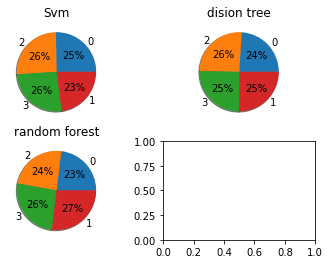

In [380]:
import matplotlib.pyplot as plt


labels =  '0','2','3','1',
Svm= [253,257,261,229]
langs1 = ['0','2','3','1']
disiontree=[240,257,252,251]
langs2 = ['0','2','3','1']
randomforest=[225,234,252,262]



fig, axs = plt.subplots(2, 2)


axs[0, 0].pie(Svm, labels=labels, autopct='%.0f%%', shadow=True)
axs[0, 0].title.set_text('Svm')


axs[0, 1].pie(disiontree, labels=langs1, autopct='%.0f%%', shadow=True)
axs[0, 1].title.set_text('dision tree')

axs[1, 0].pie(randomforest, labels=langs2,autopct='%.0f%%',shadow=True)
axs[1, 0].title.set_text('random forest')  



plt.show()